# Unsupervised Anaysis of Days of week


In [ ]:
import networkx as nx
from datetime import datetime

import numpy as np
import warnings
#from custom import load_data as cf
from urllib.request import urlretrieve
import pandas as pd
from sklearn.mixture import GaussianMixture

from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Get Data

In [3]:
from jupyterworkflow.data import get_fremont_data


    


In [4]:
%%time
data = get_fremont_data()
data.head()

Wall time: 694 ms


In [5]:
%timeit





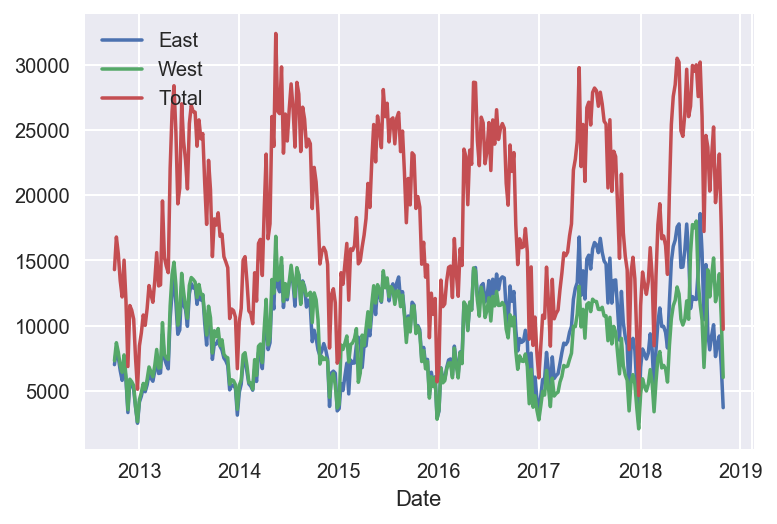

In [6]:
data.resample('W').sum().plot()

(0, 2961.2341095890415)

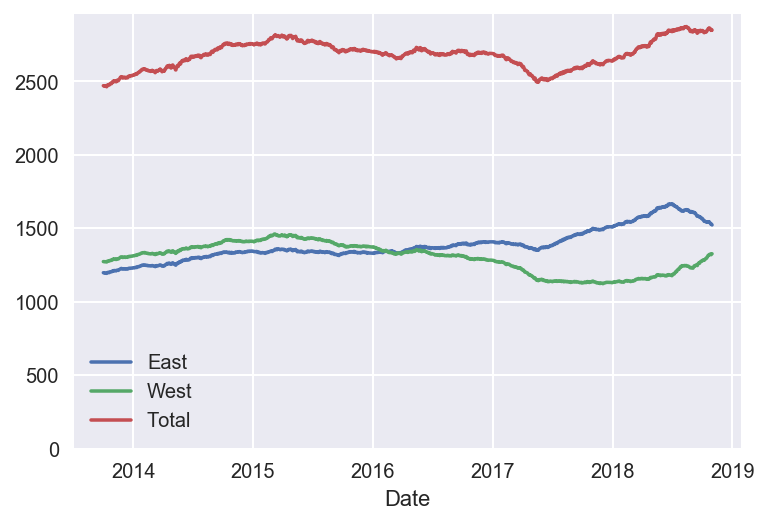

In [7]:

# %%timeit

ax=data.resample('D').sum().rolling(365).mean().plot()
    
                                  

ax.set_ylim(0,None)

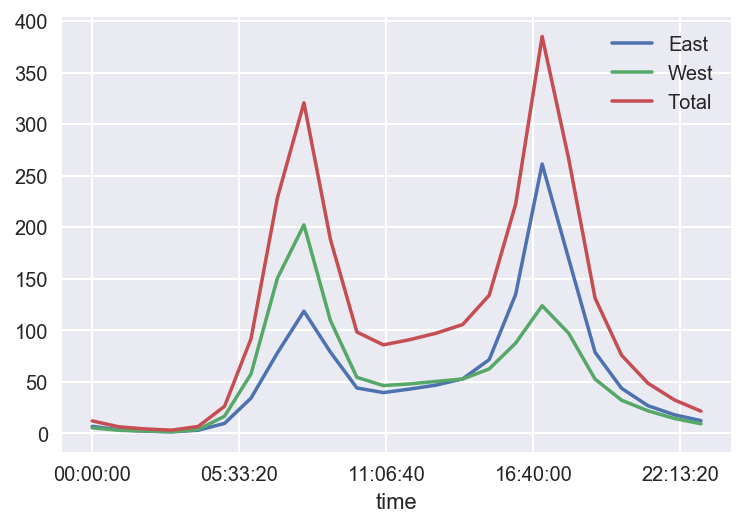

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[ :5 , :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


Wall time: 9.17 s


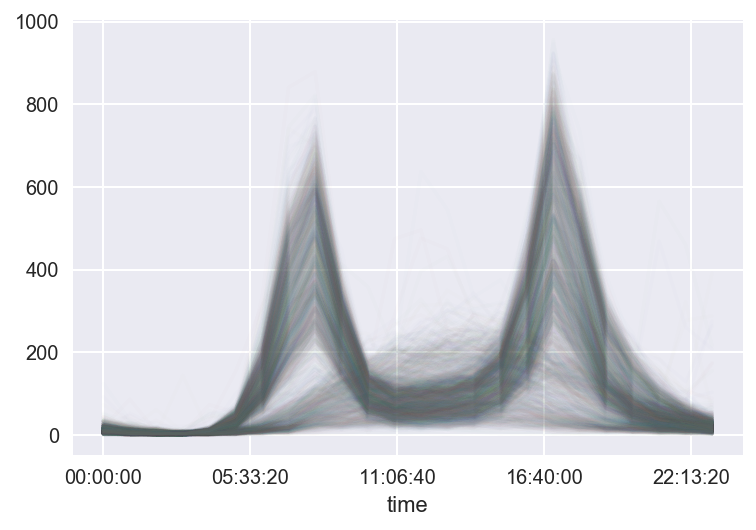

In [10]:
%%time
pivoted.plot(legend=False, alpha=0.01)


In [11]:
x = pivoted.fillna(0).T.values
x.shape


(2220, 24)

## Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA
x2=PCA(2,svd_solver='full').fit_transform(x)
x2.shape


(2220, 2)

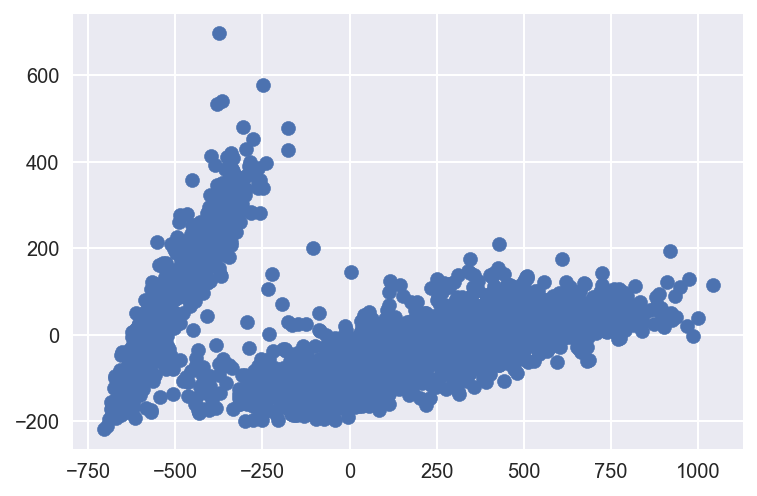

In [13]:
plt.scatter(x2[:,0],x2[:,1])

## Unsupervised Clustering 

In [14]:

gmm =GaussianMixture(2)
gmm.fit(x)
labels =gmm.predict(x)
labels

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

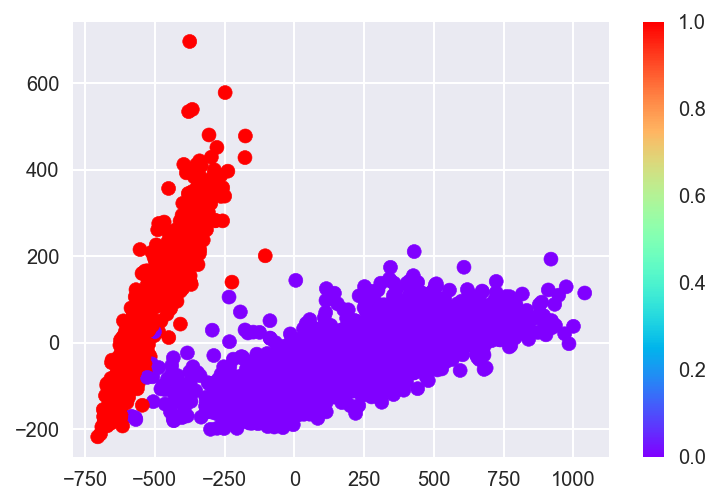

In [15]:
plt.scatter(x2[:,0],x2[:,1],c=labels,cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Red Cluster')

Text(0.5,1,'Purple Cluster')

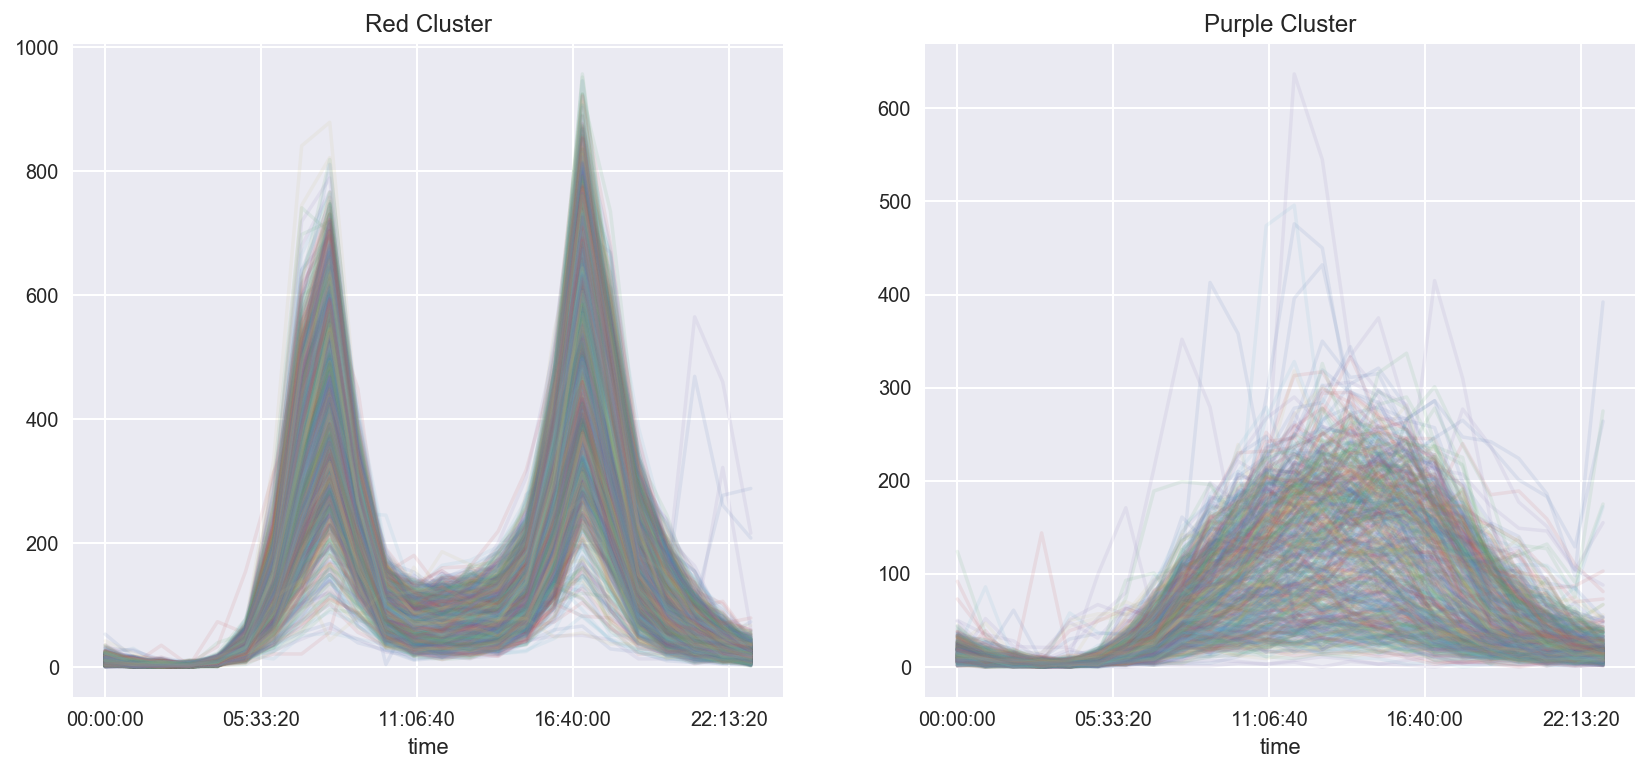

In [16]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
pivoted.T[labels ==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels ==1].T.plot(legend=False, alpha=0.1,ax=ax[1])

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

In [17]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-10-22, 2018-10-23, 2018-10-24, 2018-10-25, 2018-10-26, 2018-10-27,
       2018-10-28, 2018-10-29, 2018-10-30, 2018-10-31],
      dtype='object', length=2220)

## Comparing with day of Week

In [18]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

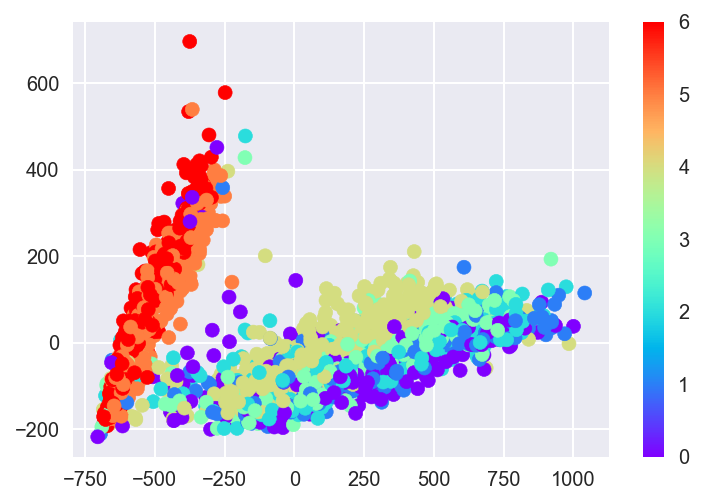

In [19]:
plt.scatter(x2[:,0],x2[:,1],c=dayofweek, cmap='rainbow')
plt.colorbar()


## Analyzing Outliers

The followings points are weekdays with a holiday-like pattern

In [20]:
dates =pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek <5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-10-18', '2018-10-19', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-29',
               '2018-10-30', '2018-10-31'],
              dtype='datetime64[ns]', length=1534, freq=None)

Feb 6,2017 [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)
